In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../csv/housing.csv")
df
print(df.head(5)) # 상위 5개
print(df.info()) # 정보출력
# 연속형변수9개 , 범주형 1개 
# ocean_proximity -> object 1개
# 나머지 연속형변수 numeric 전처리만 하면 되겠다 MinMaxScaler or StandardScaler 등

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [2]:
print(df.isnull().sum()) # 결측치 확인
# total_bedromms안에 207개에 결측치 
# print(df.describe())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


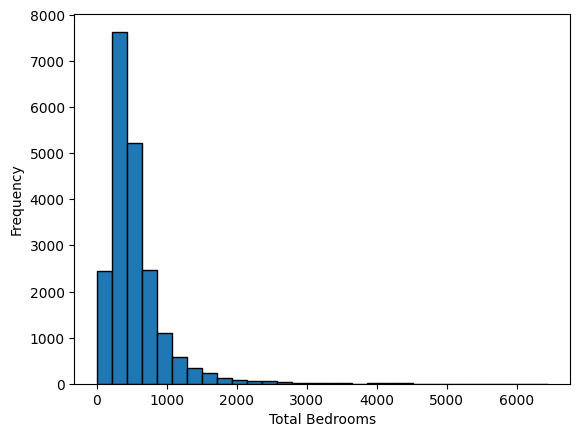

In [3]:
plt.hist(df['total_bedrooms'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.show()

In [4]:
median_bedroom = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedroom, inplace=True)
print(df.isnull().sum()) # 결측치 제거 확인

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


/tmp/ipykernel_2572221/1804607488.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedroom, inplace=True)


In [5]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

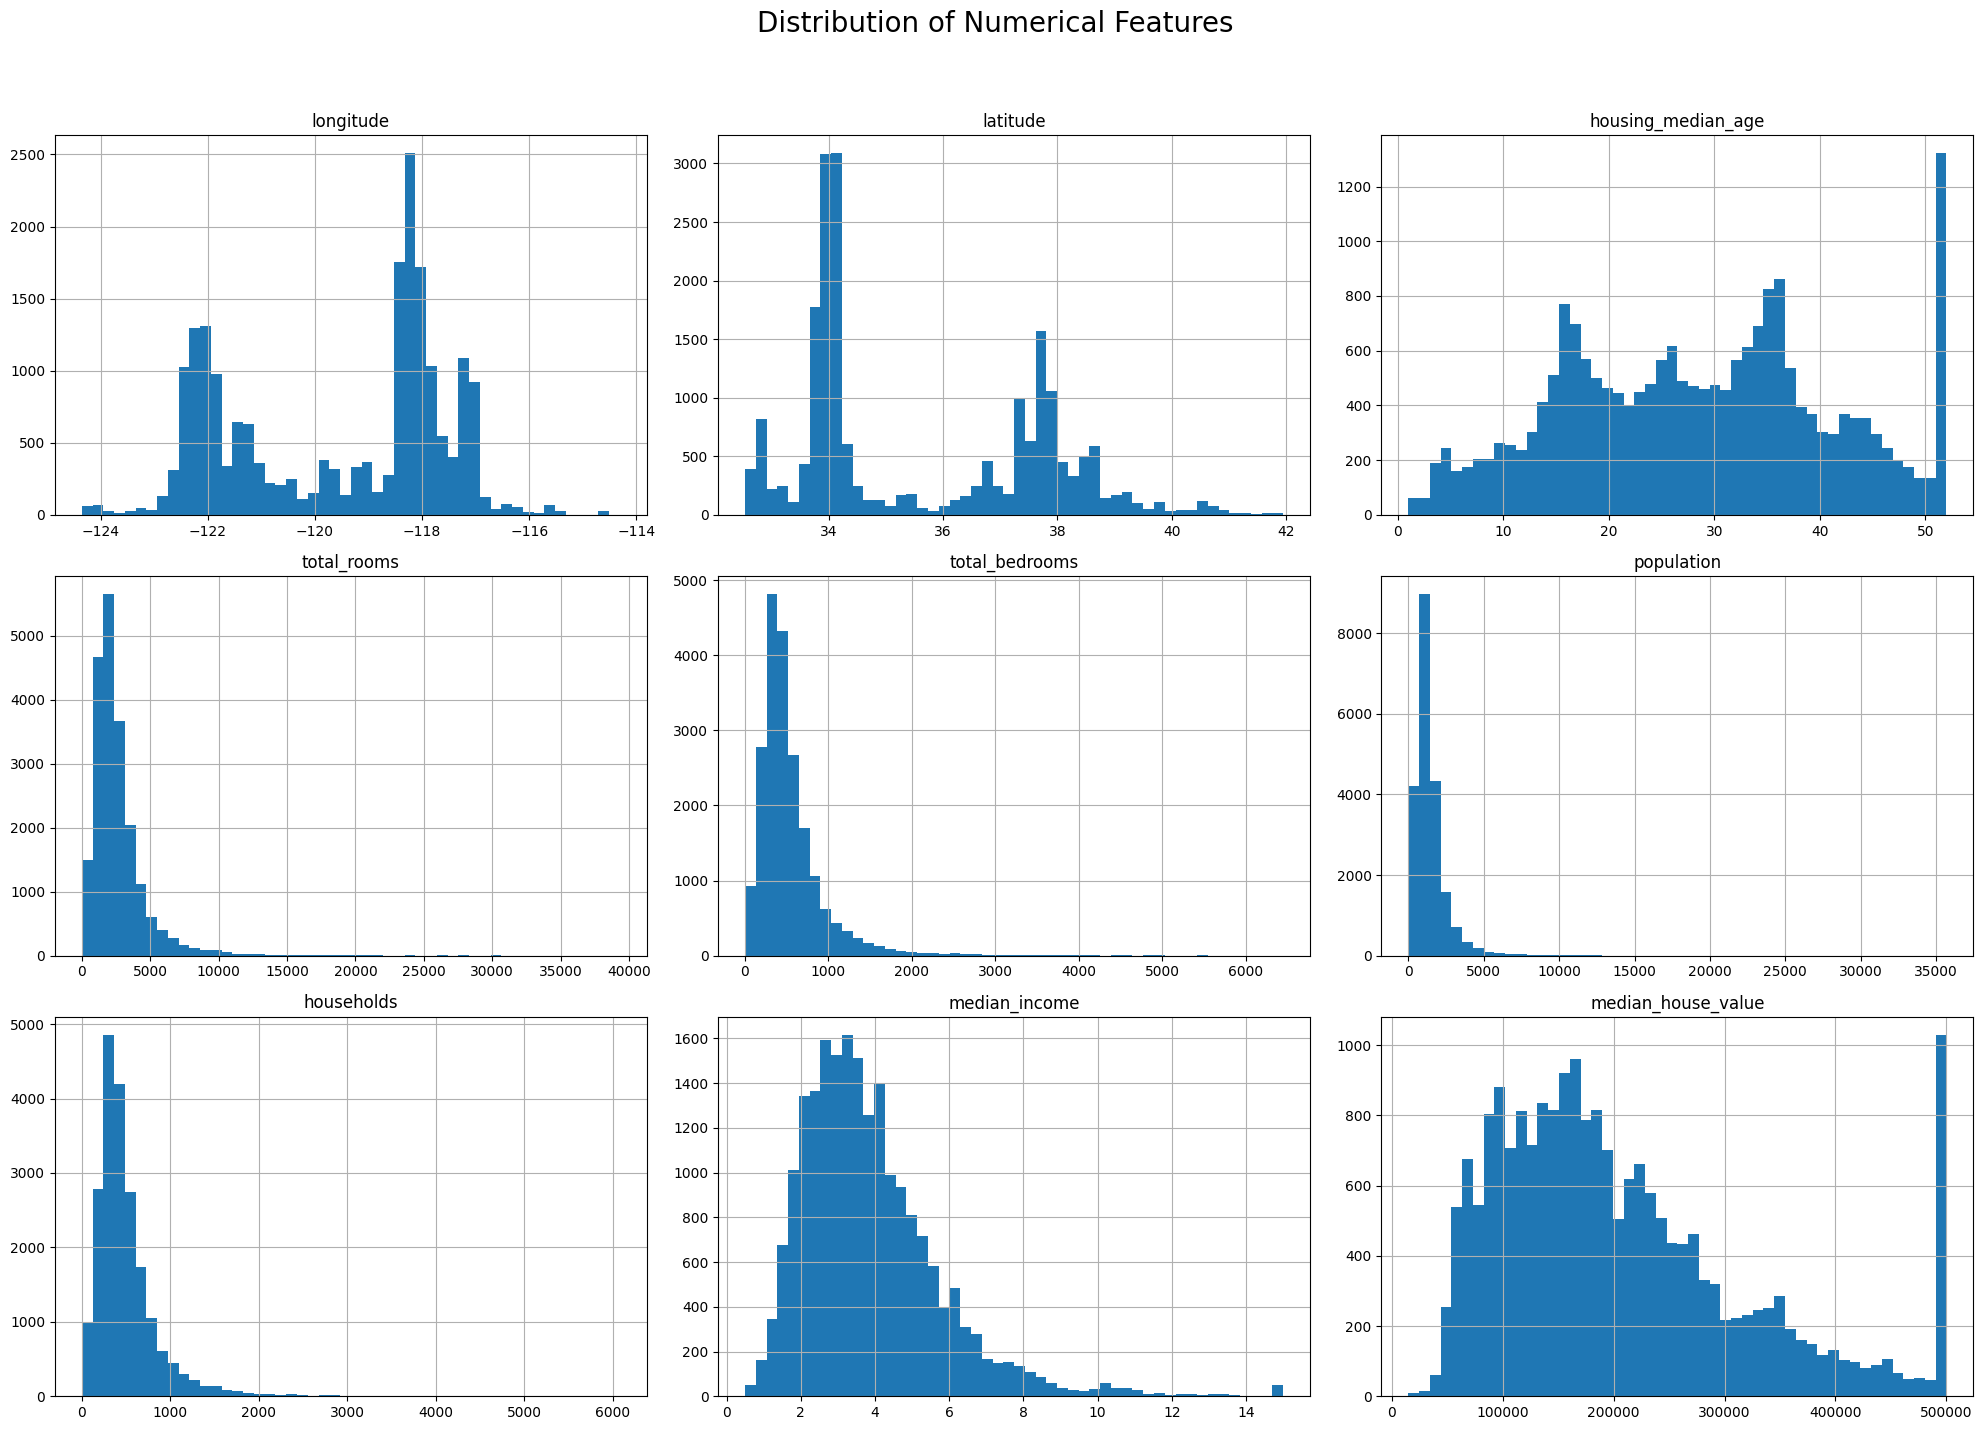

In [6]:
# 전체 수치형 변수에 대한 히스토그램 그리기
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Distribution of Numerical Features", size=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # suptitle과 겹치지 않도록 조정
plt.show()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


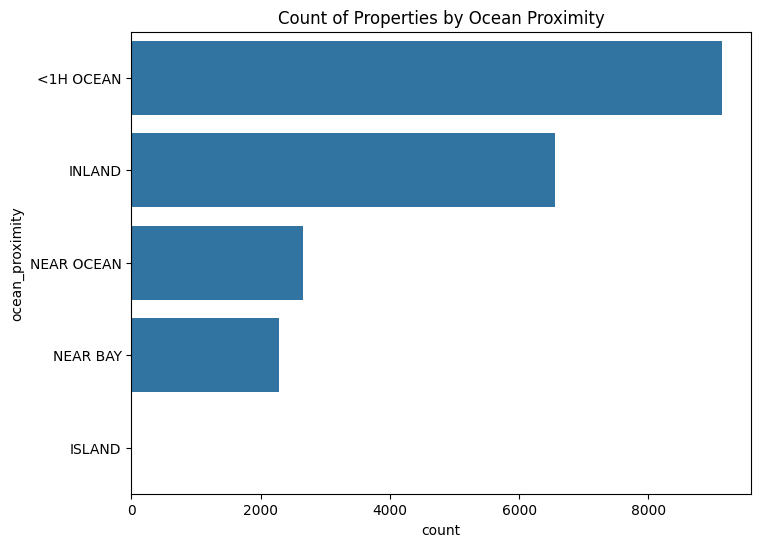

In [7]:
# ocean_proximity 변수의 카테고리별 개수 확인
print(df['ocean_proximity'].value_counts())

# countplot으로 시각화
plt.figure(figsize=(8, 6))
sns.countplot(y='ocean_proximity', data=df, order=df['ocean_proximity'].value_counts().index)
plt.title('Count of Properties by Ocean Proximity')
plt.show()

In [8]:
# 1) X, y 분리
X = df.drop('median_house_value', axis=1)  
y = df['median_house_value']

# 2) 범주형 변수 처리 (one-hot 인코딩)
X = pd.get_dummies(                     
    X,
    columns=['ocean_proximity'],
    drop_first=True
)

# 3) train/test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,                      
    random_state=1
)

# 4) MinMaxScaler 적용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled  = scaler.transform(X_test)      

# 5) validation 세트 분할
X_train_final, X_valid, y_train_final, y_valid = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,                        # 원본 코드와 동일
    random_state=1
)


In [9]:
from sklearn.ensemble import RandomForestRegressor

# 모델 초기화
model = RandomForestRegressor()
model.fit(X_train_final, y_train_final)  

RandomForestRegressor()

In [25]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

# 예측
y_valid_pred = model.predict(X_valid)

# 평가 지표 계산
mse = mean_squared_error(y_valid, y_valid_pred)
rmse = root_mean_squared_error(y_valid, y_valid_pred)
r2  = r2_score(y_valid, y_valid_pred)

print(round(mse,3))
print(round(rmse,3))
print(round(r2,3))

2384652717.753
48832.906
0.818


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 예측
y_valid_pred = model.predict(X_valid)

# 평가 지표 계산
mse = mean_squared_error(y_valid, y_valid_pred)
rmse = np.sqrt(mse)
r2  = r2_score(y_valid, y_valid_pred)

print(round(mse,3))
print(round(rmse,3))
print(round(r2,3))

2384652717.753
48832.906
0.818


In [11]:
# 테스트 세트 스케일링된 데이터 사용
y_test_pred = model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test  = r2_score(y_test, y_test_pred)

print(round(mse_test,3))
print(round(rmse_test,3))
print(round(r2_test,3))

2468935142.371
49688.38
0.812


In [21]:
import pandas as pd

feature_names = X.columns
importances   = model.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feat_imp.head())
print(feat_imp.tail())

median_income             0.486689
ocean_proximity_INLAND    0.141982
longitude                 0.107974
latitude                  0.102697
housing_median_age        0.051860
dtype: float64
total_bedrooms                0.021945
households                    0.019012
ocean_proximity_NEAR OCEAN    0.010366
ocean_proximity_NEAR BAY      0.001129
ocean_proximity_ISLAND        0.000387
dtype: float64


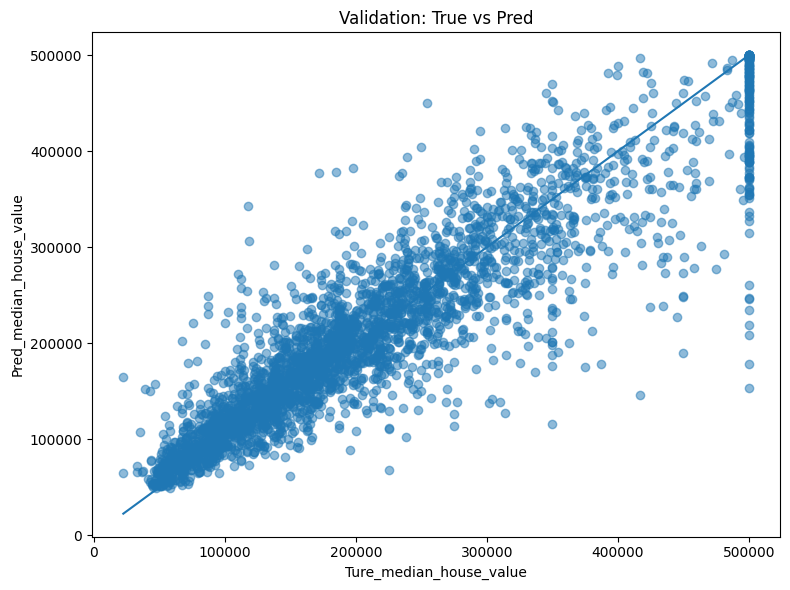

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 10) Validation: 실제 vs 예측 산점도
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_valid_pred, alpha=0.5)             # 실제 vs 예측
plt.plot([y_valid.min(), y_valid.max()],
         [y_valid.min(), y_valid.max()],
         linewidth=1.5)                                   # 대각선 기준선
plt.xlabel('Ture_median_house_value')
plt.ylabel('Pred_median_house_value')
plt.title('Validation: True vs Pred')
plt.tight_layout()
plt.show()


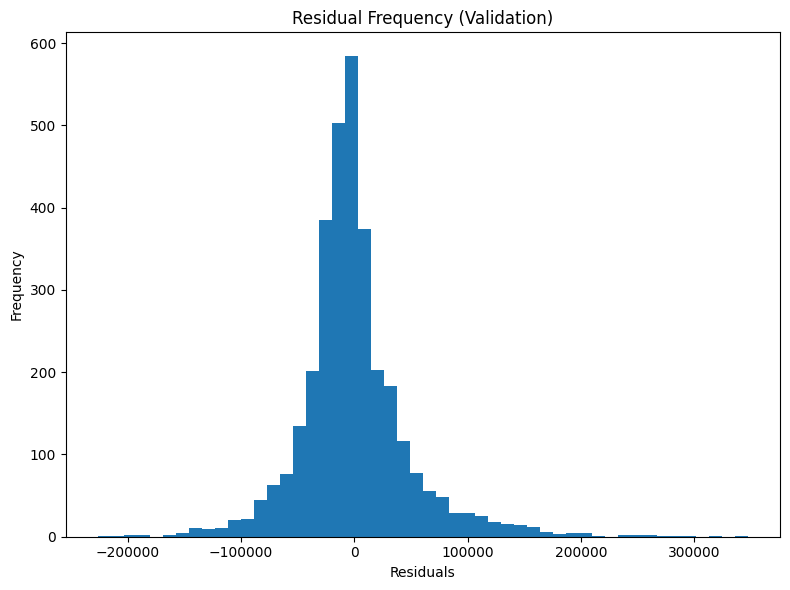

In [29]:
# 11) Residual 분포
residuals = y_valid - y_valid_pred                       # 잔차 계산
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50)                             # 히스토그램
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Frequency (Validation)')
plt.tight_layout()
plt.show()

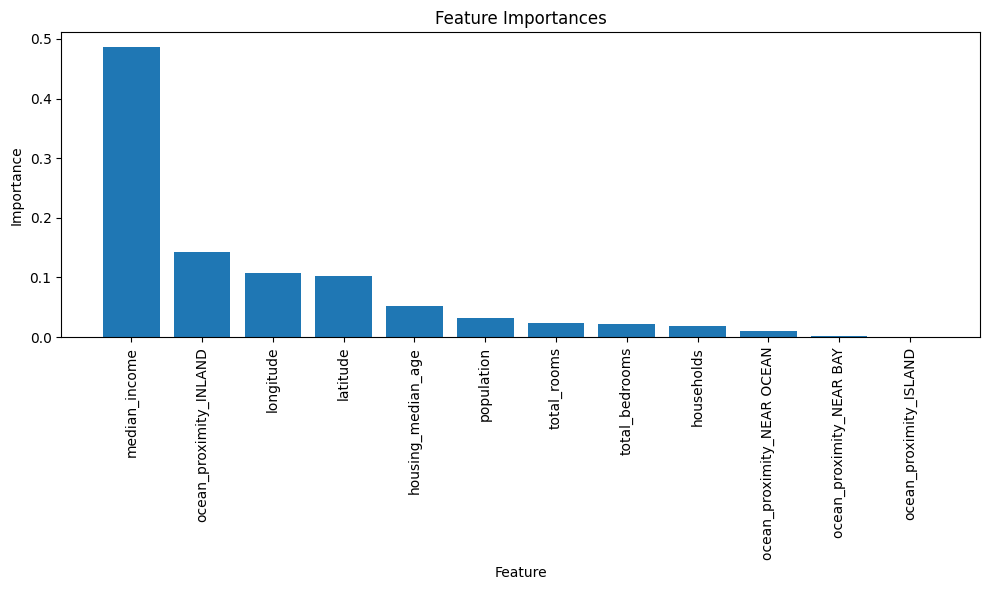

In [31]:
importances   = model.feature_importances_
feature_names = X.columns
indices       = np.argsort(importances)[::-1]            

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(importances)), importances[indices]) 
plt.xticks(np.arange(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [13]:
# 새로운 비율 기반 변수 생성
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# 새로 생성된 변수를 포함하여 다시 통계량 확인
print(df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].describe())

       rooms_per_household  bedrooms_per_room  population_per_household
count         20640.000000       20640.000000              20640.000000
mean              5.429000           0.213794                  3.070655
std               2.474173           0.065248                 10.386050
min               0.846154           0.037151                  0.692308
25%               4.440716           0.175225                  2.429741
50%               5.229129           0.203159                  2.818116
75%               6.052381           0.240126                  3.282261
max             141.909091           2.824675               1243.333333


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64


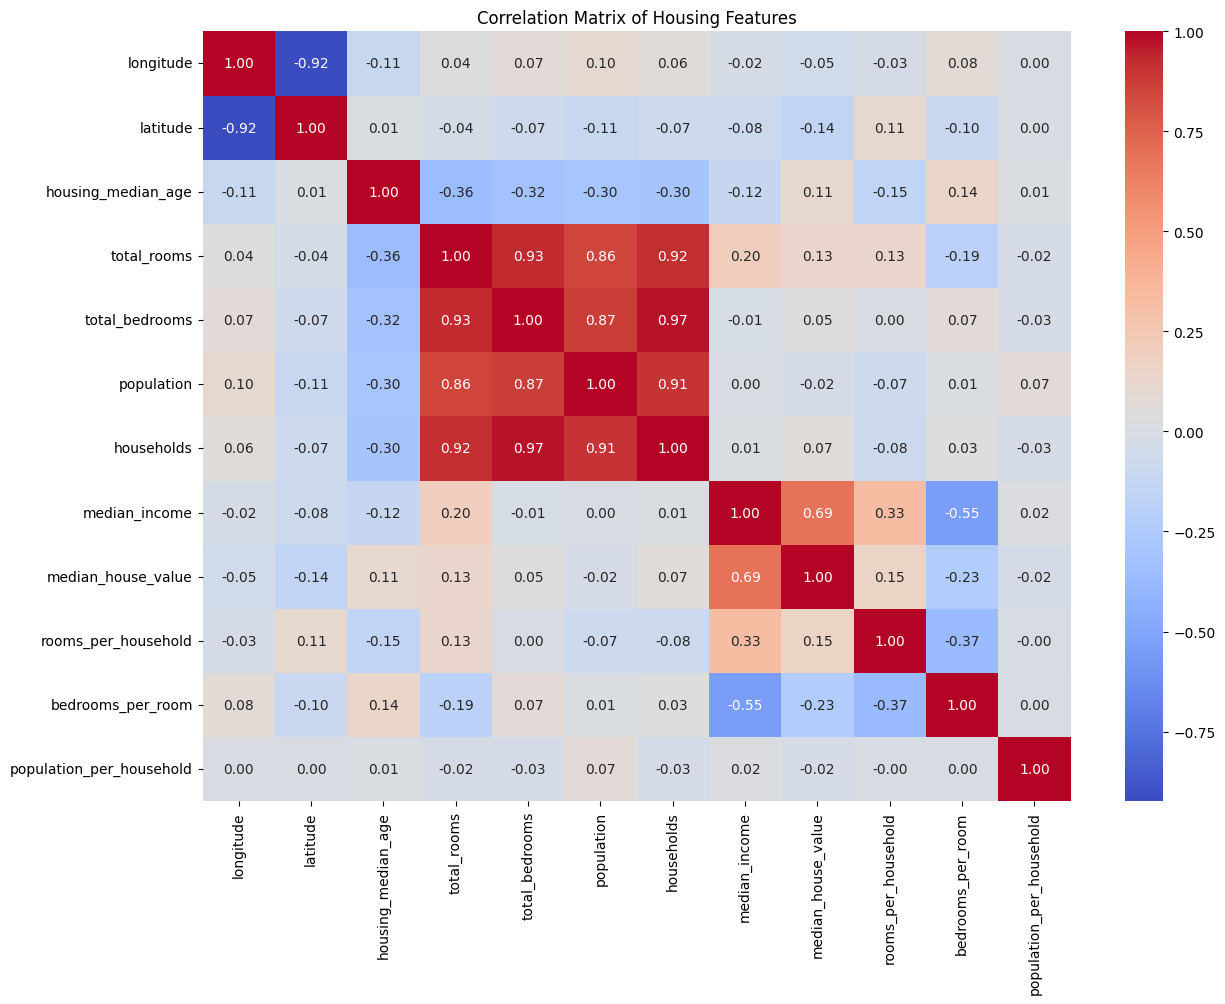

In [14]:
# 상관관계 행렬 계산 (수치형 데이터만 대상)
corr_matrix = df.corr(numeric_only=True)

# median_house_value와의 상관관계가 높은 순으로 정렬하여 확인
print(corr_matrix['median_house_value'].sort_values(ascending=False))

# 히트맵으로 전체 상관관계 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Housing Features')
plt.show()

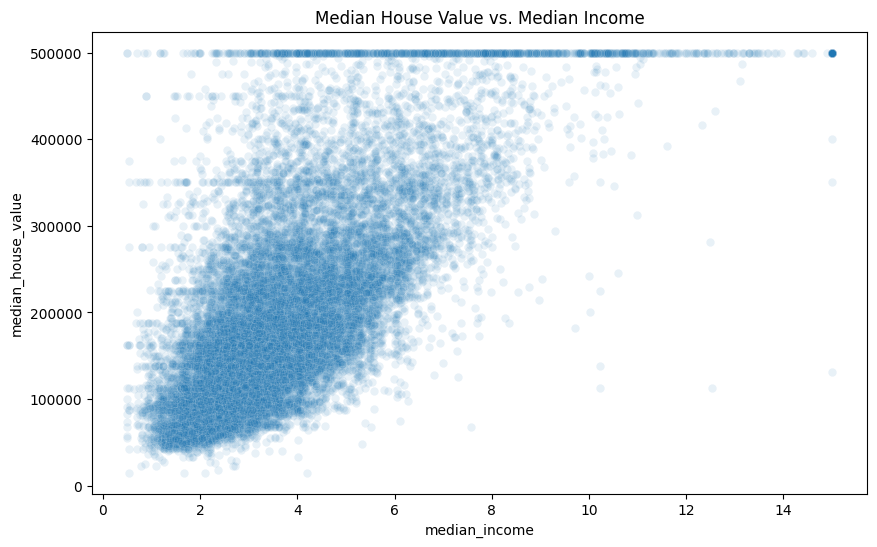

In [15]:
# 소득과 주택 가격의 관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.1)
plt.title('Median House Value vs. Median Income')
plt.show()

In [16]:
import folium
import branca.colormap as cm

# 1. ColorMap 만들기
min_price = df["median_house_value"].min()
max_price = df["median_house_value"].max()

colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'],
                             vmin=min_price, vmax=max_price)

# 지도 생성
m = folium.Map(location=[37, -119], zoom_start=6)

# 마커 추가
for _, row in df.iterrows():
    price = row["median_house_value"]
    color = colormap(price)  # 가격에 따라 색상 결정

    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=min(row["population"]/1000, 10),
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"${price:,.0f}"
    ).add_to(m)

# ColorMap(범례) 추가
colormap.caption = "Median House Value"
colormap.add_to(m)

# 지도 출력
m

ModuleNotFoundError: No module named 'folium'